### Load & show image

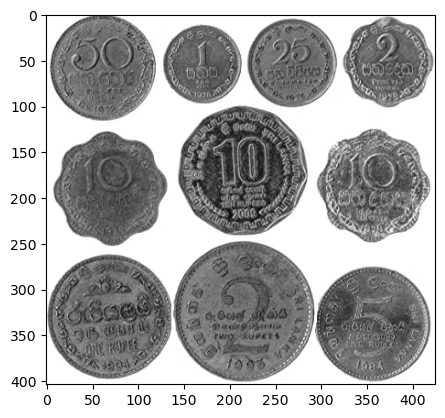

In [1]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('asserts/sl coins.jpg',0)

plt.imshow(img,cmap='gray')

### Thresholding to image

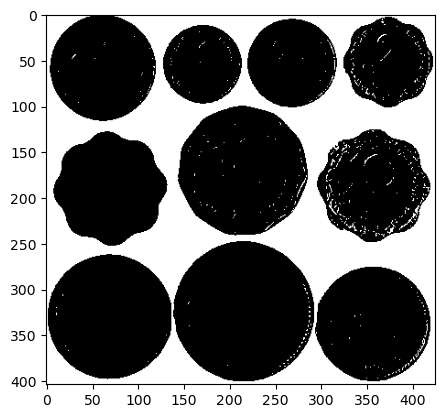

In [2]:
ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')

### Image detection (find contours)

In [6]:
img = cv2.imread('asserts/sl coins.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 200, 255, cv2.THRESH_BINARY)

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))
print(len(contours[8]))
print(len(contours[8]))

cv2.drawContours(img, contours,-1, (0,255,0), 3)

cv2.imshow('thresh',thresh)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


456
5
5


### Short contours

In [7]:
img = cv2.imread('asserts/sl coins.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 200, 255, cv2.THRESH_BINARY)

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area=cv2.contourArea(cnt)
    print(area)
    if(area>18000 and area<20000):
        cv2.drawContours(img, [cnt],-1, (0,0,255), 2)

cv2.imshow('thresh',thresh)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

170872.0
12463.0
0.0
0.0
0.0
0.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
1.0
0.0
0.0
1.0
0.5
0.0
11.0
6.0
0.0
0.0
0.5
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
14688.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
18653.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
0.0
0.5
0.5
0.0
1.5
1.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.5
0.0
0.0
0.0
0.5
0.5
0.0
2.0
10.0
11398.0
11199.5
0.0
0.5
0.0
1.5
0.0
0.0
0.5
0.0
0.5
0.0
10.5
1.5
0.5
0.0
0.0
0.0
0.0
0.5
0.0
8.5
0.0
0.0
0.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
14.5
0.0
0.0
1.0
0.0
1.0
11.5
1.5
0.0
0.0
0.0
0.0
0.0
14.0
0.0
0.5
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.5
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
0.0
0.0
0.5
1.5
0.5
0.0
0.5
0.0
0.0
1.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
7.0
0.0
0.5
0.0
2.0
6.0
0.5
0.0
2.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.5
1.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
15694.5
0.0
4.0
0.0
0

### Add bounding rectangle

In [9]:
img = cv2.imread('asserts/sl coins.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 200, 255, cv2.THRESH_BINARY)

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area=cv2.contourArea(cnt)

    if(area>18000 and area<20000):
        cv2.drawContours(img, [cnt],-1, (0,0,255), 2)
        x,y,w,h=cv2.boundingRect(cnt)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
        print(x,y,w,h)

cv2.imshow('thresh',thresh)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()




138 247 156 155


### Real time detection

In [10]:
import cv2

source=cv2.VideoCapture(0)

#0-webcam
#1,2,3=usb camera
#myVideo.mp4-file
#124.35.32.43.643 p/w user name - wifi camera

while(True):
    
    ret,img=source.read()
    #print(ret)
    
    if(ret==False):
        break
    
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 80, 255,cv2.THRESH_BINARY)

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        area=cv2.contourArea(cnt)
        print(area)
        if(area>16000):
            cv2.drawContours(img, [cnt], -1, (0,255,255), 2)
            x,y,w,h = cv2.boundingRect(cnt)
            print(x,y,w,h)
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)

    cv2.imshow('thresh',thresh)
    cv2.imshow('img',img)
    key=cv2.waitKey(10)
    
    if(key==27):
        break
    
cv2.destroyAllWindows()
source.release()

0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
3.0
0.5
0.0
0.0
0.0
0.0
5.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
2.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
19.0
2.0
0.0
0.0
0.0
1.0
4.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
1.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
5.0
4.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
1.0
1.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
9.5
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
9.5
0.0
0.5
0.0
0.0
0.0
7.0
0.0
0.0
0.0
1.5
3.5
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
5.5
0.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
0.0
1.5
0.0
0.0
0.0
0.0
5.5
2.0
0.0
0.5
0.0
0.0
0.0
9.5
0.0
0.0
0.5
2.0
0.0
0.0
0.0
0.0
94.5
2.0
16.0
0.0
0

22.0
21.0
2.0
2.0
13.0
5.5
90.0
2.0
4.0
20.0
6.0
2.0
5.5
2.0
2.0
19.5
2.0
8.0
4.0
2.0
2.0
8.5
13.5
7.0
2.0
2.0
4.0
2.0
73.0
2.0
7.0
2.0
29.5
7.0
2.0
6.0
18.0
2.0
2.0
11.5
2.0
2.0
70.5
2.0
2.0
4.0
7.0
65.5
0.0
2.0
9.5
6.0
2.0
9.0
2.0
2.0
4.0
2.0
2.0
2.0
37.5
2.0
16.5
5.5
190.5
0.0
0.0
2.0
2.0
10.5
9.5
2.0
5.5
8.0
2.0
12.5
0.5
0.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
1.5
0.0
1.5
0.0
5.5
0.0
0.0
2.5
0.0
0.0
0.0
9.5
0.0
0.0
1.0
0.0
0.0
0.5
1.0
2.5
0.0
0.0
3.0
18.5
2.0
2.0
0.0
0.5
9.5
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
9.0
0.0
0.0
0.0
0.0
7.5
0.0
1.0
0.5
0.5
6.0
2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.5
0.0
0.0
5.0
0.0
0.0
1.0
0.0
29.5
0.0
0.0
0.0
0.0
0.0
5.5
0.0
2.5
3.5
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.5
0.0
0.0
0.0
0.5
0.5
1.5
0.0
5.5
0.0
4.0
9.0
0.0
1.5
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.5
0.0
1.0
1.0
1.0
0.5
0.0
0.0
1.0
2.5
0.0
0.0
0.0
0.0
4.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
9.0
0.0
0.0
1.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
10.0
0.0
1.5
0.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
1.5
5.0
2.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
6.5
0.5
0.0
0.5
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
1.0
2.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
0.0
0.0
0.0
0.0
7.0
0.0
2.0
0.0
0.5
2.5
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0
0.0
11.5
0.0
24.0
0.0
0.0
0.0
0.5
2.0
0.0
3.5
1.0
2.0
0.0
0.0
3.0
0.0
1.0
3.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
0.5
2.0
0.0
0.0
0.0
4.0
0.0
0.0
6.5
0.0
0.0
3.5
0.0
0.0
0.0
27.0
0.5
1.5
19.5
1.0
0.0
0.0
0.0
9.0
0.0
0.0
0.0
3.5
0.0
0.0
1.5
0.0
0.0
0.0
1.0
0.0
0.0
0.0
2.0
1.0
0.0
0.0
0.0
10.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
2.0
0.0
0.0
0.0
17.5
0.0
0.0
0.0
1.5
0.0
5.5
1.0
40.5
2.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
3.5
1.0
0.0
0.5
0.0
0.0
0.0
0.0
14.0
2.0
5.5
0.0
0.0
0.5
24.5
39.0
2.0
0.0
0.0
0.0
0.5
0.0
0.0
1.0
1.5
10.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0


0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
10.0
1.0
0.5
0.0
0.5
0.0
0.5
0.0
0.0
0.0
0.0
1.5
0.0
20.5
0.0
0.0
0.0
1.0
35.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
2.5
0.0
1.5
0.0
6.0
2.0
0.0
16.5
0.0
0.0
5.0
1.5
0.0
1.0
0.0
3.5
0.0
7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.5
0.0
0.5
1.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
1.0
0.0
10.5
0.0
4.0
1.0
6.5
0.0
0.0
3.5
0.0
10.5
0.0
0.5
0.5
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
1.5
0.0
1.5
2.5
0.5
0.5
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
16.0
0.0
0.0
0.0
0.0
0.5
0.5
0.0
1.0
0.0
0.0
16.0
2.0
0.0
50.5
4.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
11.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
1.0
0.0
0.0
0.0
0.0
2.0
2.5
0.0
0.5
2.0
0.0
1.5
0.0
0.0
0.0
0.0
9.5
0.5
0.0
0.0
1.5
1.0
0.0
0.0
0.0
0.0
8.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.5
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.

2.0
2.0
4.0
2.0
2.0
4.0
6.0
2.0
9.0
2.0
6.0
5.5
13.0
2.0
8.5
13.0
2.0
2.0
2.0
20.5
9.0
4.0
2.0
8.5
4.0
4.0
13.0
4.0
2.0
93.5
0.0
9.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
18.5
2.0
2.0
10.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
12.5
2.0
2.0
43.5
2.0
4.0
4.0
2.0
2.0
21.5
2.0
2.0
4.0
2.0
8.5
2.0
35.5
31.5
2.0
2.0
2.0
2.0
2.0
5.5
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
4.0
9.0
2.0
2.0
8.5
8.0
4.0
2.0
2.0
2.0
2.0
2.0
5.5
2.0
30.0
7.5
2.0
7.5
4.0
2.0
2.0
4.0
12.5
2.0
8.5
2.0
2.0
2.0
56.5
31.0
2.0
115.5
0.0
0.0
4.0
4.0
2.0
14.5
28.5
4.0
4.0
22.5
4.0
2.0
2.0
5.5
8.5
4.0
2.0
2.0
2.0
10.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
26.5
2.0
2.0
2.0
2.0
2.0
7.5
2.0
2.0
10.0
2.0
7.0
4.0
2.0
2.0
5.5
4.0
2.0
2.0
4.0
4.0
2.0
5.5
4.0
25.0
0.0
2.0
20.5
4.0
7.0
2.0
13.0
4.0
2.0
34.0
2.0
2.0
4.0
2.0
2.0
2.0
4.0
4.0
28.5
2.0
28.0
2.0
4.0
2.0
4.0
2.0
52.5
2.0
29.0
2.0
6.0
11.0
2.0
5.5
2.0
2.0
2.0
60.0
2.0
4.0
2.0
2.0
2.0
22.0
4.0
2.0
2.0
2.0
4.0
41.5
2.0
2.0
62.0
0.0
18.0
4.0
2.0
4.0
12.5
4.0
2.0
2.0
2.0
2.0
4

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
3.5
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
6.5
0.0
6.5
0.0
28.5
2.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
13.0
2.0
3.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
3.5
8.5
0.0
5.5
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
16.0
0.0
2.0
0.0
2.0
0.5
5.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
7.0
0.0
1.5
0.5
0.0
2.0
0.0
0.0
0.0
0.0
0.0
20.5
2.0
0.0
0.0
0.0
0.5
0.0
3.0
0.0
0.0
5.0
0.0
1.0
59.0
2.0
4.0
10.0
0.0
1.5
0.0
14.0
9.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
2.5
0.0
0.0
3.0
0.0
0.0
5.5
0.0
0.0
0.0
2.5
2.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
11.5
69.5
2.0
8.0
0.0
22.5
2.0
0.0
8.5
2.0
0.0
0.0
9.5
0.0
0.5
0.0
0.0
0.0
9.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.5
4.5
2.0
6.0
0.0
0.0
5.5
0.0
0.0
0.0
0.0
6.0
0.0
4.0
3.5
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
2.5
0.0
0.0
1.0
0.5
0.0
0.0
0.0
0.0
0.0
8.5
4.0
0.0
0.0
0.0
1.0
2.5
0.0
1.5
0.0
0.0
0.0
17.5
5.5
2.5
0.0
0.0
0.5
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
1.0
0.0
2.5
1.5
0.0
0.0
0.0
1.5
0.5
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
2.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.5
2.0
0.0
0.0
1.0
5.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
8.5
11.0
0.0
0.5
0.0
1.0
0.0
4.5
0.0
1.0
0.0
0.0
0.0
0.5
0.0
1.5
0.0
0.0
0.0
5.0
2.5
0.0
0.0
0.5
12.5
0.0
1.0
40.0
2.0
2.0
0.0
5.5
2.0
0.0
2.5
0.0
1.5
0.0
3.0
3.0
0.0
62.5
2.0
2.0
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
6.5
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
110.0
7.0
9.0
2.0
4.0
2.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.5
2.0
6.5
0.0
0.0
0.0
0.0
0.0
2.0
0.0
1.5
1.0
0.5
0.0
0.5
0.0
1.0
1.5
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
1.5
1

254.0
2.0
1.5
2.0
4.0
2.0
4.0
12.0
2.0
41.0
2.0
28.5
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
4.0
8.5
2.0
2.0
2.0
12.5
2.0
7.0
2.0
2.0
4.0
2.0
4.0
5.5
2.0
4.0
2.0
4.0
2.0
4.0
7.0
2.0
13.5
2.0
2.0
2.0
2.0
2.0
2.0
5.5
16.0
2.0
5.5
2.0
2.0
2.0
2.0
2.0
2.0
56.5
7.5
2.0
2.0
2.0
2.0
15.0
2.0
47.5
2.0
4.0
7.5
2.0
2.0
2.0
2.0
2.0
10.0
5.5
2.0
2.0
14.5
2.0
2.0
193.0
0.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
10.0
4.0
7.0
2.0
8.0
2.0
14.0
11.5
2.0
7.0
27.0
2.0
2.0
4.0
4.0
67.0
4.0
8.0
45.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
4.0
2.0
2.0
2.0
2.0
2.0
20.0
2.0
5.5
2.0
2.0
30.0
2.0
4.0
2.0
15.0
2.0
4.0
2.0
22.0
6.0
16.0
2.0
2.0
5.5
2.0
5.5
2.0
10.5
2.0
2.0
10.0
2.0
15.5
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
39.5
4.0
2.0
6.0
4.0
6.0
2.0
2.0
13.0
5.5
2.0
29.0
4.0
2.0
2.0
2.0
2.0
8.5
4.0
2.0
6.0
2.0
57.0
8.5
13.5
2.0
9.0
2.0
2.0
2.0
2.0
2.0
5.5
2.0
7.0
2.0
2.0
2.0
2.0
2.0
2.0
5.5
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
76.5
52.5
10.5
30.5
2.0
9.5
36.5
2.0
2.0
9.5
8.5
8.5
2.0
7.5
102.0
0.0
8.5
2.0
2.0
9.5
2.0
2.0
66.

2.0
7.0
2.0
5.5
4.0
4.0
2.0
4.0
4.0
4.0
7.5
8.5
5.5
7.0
13.0
30.0
2.0
28.0
2.0
2.0
4.0
12.5
4.0
140.5
0.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
76.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
5.5
2.0
4.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
4.0
2.0
4.0
2.0
5.5
2.0
2.0
4.0
2.0
2.0
4.0
2.0
2.0
2.0
13.5
4.0
2.0
2.0
9.0
5.5
10.5
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
8.0
2.0
10.5
2.0
2.0
2.0
2.0
4.0
4.0
4.0
15.5
4.0
4.0
18.0
4.0
56.5
0.0
2.0
4.0
2.0
10.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
18.0
4.0
2.0
2.0
2.0
9.5
4.0
2.0
4.0
2.0
31.5
31.0
5.5
5.5
7.0
42.0
2.0
2.0
8.5
18.5
2.0
2.0
7.0
4.0
2.0
2.0
100.0
2.0
2.0
32.5
7.5
2.0
2.0
5.5
4.0
10.5
5.5
2.0
2.0
11.5
2.0
2.0
8.0
2.0
8.5
7.0
10.0
2.0
2.0
4.0
10.5
7.5
2.0
4.0
2.0
6.0
6.0
2.0
2.0
4.0
2.0
6.0
2.0
4.0
2.0
2.0
7.5
9.0
4.0
4.0
4.0
2.0
7.0
19.0
2.0
5.5
2.0
14.0
2.0
4.0
2.0
15.5
2.0
9.5
4.0
2.0
2.0
32.0
2.0
2.0
8.0
6.0
4.0
2.0
2.0
16.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
7.5
0.0
6.5
1.5
7.0
2.0
0.0
0.0
0.5
22.5
5.5
12.0
0.0
0.0
0.5
0.5
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.5
1.5
0.0
0.5
0.0
0.5
0.0
0.0
21.0
4.0
2.0
0.0
1.5
0.0
0.0
0.0
3.5
0.5
0.0
0.0
0.0
0.0
0.0
5.5
0.0
0.0
2.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
2.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
2.0
0.5
0.0
0.0
2.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
17.5
3.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
1.0
0.0
0.0
35.0
2.0
4.0
0.0
14.0
0.0
0.0
2.0
3.5
0.0
0.0
1.0
1.0
1.0
0.5
0.0
19.0
3.5
1.5
0.0
37.5
0.0
0.0
0.0
0.0
16.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
27.5
0.0
0.0
0.5
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
4.5
0.5
16.5
13.5
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.5
0.0
2.0
0.0
0.0
1.0
0.0
2.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
8.5
0.0
0.0
0.0
15.5
0.0
0.0
1.0
0.0
0.0
0.0
0.5
0.0
0.0
5.0
0.0
0.0
2.0
0.0
0.5
0.0
0.0
0.0
1.5
0.0
0.5
0.0
5.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
2.5
6.5
0.0
0.0
12.5
5.5
0.0
0.5
0.0
0.0
0.0
0.0
33.0
2.0
0.0
0.0
0.0
3.5
0.5
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
6.0
36.0
2.0
0.0
0.0
0.0
0.

0.0
0.0
0.0
0.5
1.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
1.0
7.0
0.0
0.0
3.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
19.0
0.0
0.0
35.5
0.0
3.5
0.0
0.0
2.0
0.5
0.0
4.0
2.0
0.0
0.0
15.0
0.0
12.5
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
5.5
1.5
0.0
0.0
0.0
10.5
0.0
2.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
13.5
1.5
0.0
0.0
0.0
0.0
11.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
2.5
4.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
0.0
25.0
2.0
1.0
0.5
0.0
0.0
0.5
0.0
0.0
0.0
8.5
0.0
0.0
5.5
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
6.0
0.0
0.0
0.0
0.0
0.0
1.5
1.0
0.0
0.0
1.5
0.0
1.5
21.5
4.0
0.5
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
2.5
1.5
0.0
0.0
0.0
6.0
0.0
10.5
2.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
1.5
0.0
0.0
2.0
10.5
4.0
2.0
0.0
191.5
2.0
5.5
2.0
13.5
2.0
4.0
4.0
2.0
10.0
0.0
60.0
6.0
2.0
2.0
0.0
0.0
0.0
0.0
45.0
2.0
0.5
0.0
0.0
0.0
3.5
1.0
0.5
2.0
0.0
0.0
0.0
0.0
5.0
2.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
1.5
4.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
8.0
2.0
0.0
1.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
12.5
0.0
0.0
1.5
0.5
0.0
7.0
0.0
0.0
4.5
0.0
1.5
0.5
0.0
0.0
1.5
1.5
16.5
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
6.0
1.5
0.0
0.0
2.0
0.0
1.0
3.0
0.0
0.0
0.0
0.0
0.5
34.5
4.0
2.0
0.0
10.0
0.0
0.0
0.0
0.0
2.5
0.0
1.0
0.0
0.0
0.0
0.0
23.5
4.0
2.0
0.0
0.0
2.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
2.0
0.5
0.0
5.0
10.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
5.0
0.0
0.0
6.5
0.0
6.0
0.0
0.0
0.0
2.0
2.0
0.0
21.5
2.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
59.0
2.0
0.0
0.0
0.0
3.5
3.5
1.0
0.0
0.0
0.0
15.5
0.0
0.0
1.5
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
32.0
2.0
2.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
1.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
21.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
1.0
0.5
0.0
0.0
0.0
73.5
4.0
2.0
0.0
2.5
1.0
9.5
0.0
0.0
0.0
0.0
0.0
0.0
20.5
5.5

263.0
0.0
2.0
2.0
2.0
2.0
8.5
2.0
2.0
10.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
87.5
2.0
40.0
0.0
2.0
4.0
2.0
2.0
4.0
5.5
4.0
9.0
2.0
16.5
2.0
2.0
2.0
4.0
2.0
4.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
18.0
5.5
2.0
2.0
8.5
2.0
2.0
2.0
2.0
5.5
2.0
2.0
2.0
2.0
2.0
41.0
2.0
2.0
15.0
11.5
4.0
24.0
7.5
2.0
2.0
21.5
2.0
4.0
4.0
2.0
2.0
2.0
2.0
8.5
21.5
4.0
2.0
4.0
13.0
4.0
2.0
4.0
2.0
2.0
5.5
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
7.0
6.0
9.5
4.0
2.0
17.5
8.5
2.0
2.0
4.0
2.0
4.0
2.0
2.0
2.0
8.5
2.0
2.0
4.0
11.0
2.0
7.5
22.5
2.0
2.0
4.0
126.5
2.0
4.0
2.0
2.0
2.0
7.0
143.5
0.5
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
6.0
2.0
2.0
2.0
2.0
6.0
10.0
2.0
2.0
2.0
2.0
2.0
4.0
10.0
2.0
2.0
4.0
2.0
2.0
5.5
2.0
2.0
4.0
7.0
2.0
8.5
2.0
10.5
2.0
2.0
2.0
2.0
4.0
4.0
2.0
2.0
5.5
2.0
2.0
2.0
4.0
4.0
15.0
5.5
5.5
9.0
2.0
2.0
2.0
2.0
2.0
6.0
4.0
2.0
2.0
2.0
2.0
10.0
2.0
2.0
2.0
47.5
4.0
17.0
4.0
13.0
5.5
5.5
2.0
56.5
7.0
6.0
44.5
2.0
50.0
2.0
21.0
63.0
2.0
16.5
2.0
19.5
21.0
2.0
7.5
6.0
15.0
2.0
2.0
5.5
2.0
2.0
4.0
2.0
4.0
2.0
10

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
2.0
0.5
0.5
0.5
0.0
5.0
1.0
0.0
0.0
0.0
0.5
0.0
10.5
2.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
13.5
0.0
0.0
0.5
0.0
0.0
5.0
0.0
0.0
3.0
8.5
7.5
0.5
0.0
1.0
0.0
5.5
1.0
0.0
15.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
17.0
2.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
22.5
6.0
4.0
0.0
0.0
0.0
1.5
13.0
2.5
29.5
4.0
0.0
1.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
7.0
3.5
3.5
1.5
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.5
0.0
3.0
0.0
16.0
1.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
13.5
0.5
0.0
4.0
0.5
1.0
0.0
4.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.5
35.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
16.5
2.0
2.0
0.0
0.0
0.0
12.5
2.0
10.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
3.0
0.0
6.5
4.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
4.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.5
1.5
0.0
1.0
0.0
0.0
22.0
0.0
9.5
10.5
0.0
0.0
32.0
2.0
0.0
1.0
0.0
0.0
0.0
7.5
0.0
0.0
0.0
5.0
0.0
2.0
0.0
0.0
11.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
3.5
0.0
0.0
0.0
0.0
3.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.5
5.0
0.0
0.0
0.5
6.5
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
1.5
34.5
2.0
4.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
2.0
0.0
5.0
0.0
0.0
0.0
1.0
0.5
0.0
0.0
0.0
17.0
0.0
0.0
0.0
0.0
1.0
3.5
31.5
0.0
1.5
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
3.5
0.0
0.0
0.5
0.0
0.0
4.0
0.0
0.0
0.0
1.5
2.0
5.5
0.0
1.5
0.0
0.0
0.0
0.0
0.0
1.0
46.0
2.0
4.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
37.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
1.5
0.0
11.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
0.0
11.0
4.5
0.0
0.0
0.0
0.0
55.0
2.0
2.0
2.0
0.0
1.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
12.0
13.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
1.5
0.0
3.0
3.5
0.0
12.5
2.0
0.0
0.0
0.0
0.0
0.0
24.5
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
1.5
15.0
2.0
4.0
1.5
6.0
6.0
0.0
0.0
84.5
2.0
2.0
7.0
1.0
2.0
0.0
0.0
0.0
11.0
2.0
6.5
3.5
0.0
0.0
0.0
0.0
2.0
0

5.5
11.5
2.0
2.0
2.0
2.0
4.0
4.0
9.0
2.0
2.0
20.5
8.5
2.0
2.0
7.5
7.0
2.0
7.0
4.0
2.0
10.0
2.0
2.0
2.0
2.0
11.0
5.5
2.0
2.0
2.0
11.0
5.5
2.0
22.5
4.0
2.0
32.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
7.0
18.5
13.0
2.0
11.0
22.5
223.5
0.0
0.5
0.0
1.5
2.0
5.5
2.0
103.0
0.0
0.0
4.0
29.5
16.0
4.0
5.5
14.0
2.0
2.0
138.0
0.0
0.0
2.0
2.0
2.0
6.0
4.0
2.0
2.0
23.0
2.0
2.0
12.5
4.0
2.0
2.0
5.5
2.0
5.5
18.0
2.0
4.0
39.5
4.0
2.0
16.0
4.0
2.0
2.0
6.0
2.0
13.0
2.0
4.0
2.0
2.0
2.0
27.0
6.0
11.5
2.0
2.0
2.0
6.0
27.0
10.0
7.0
42.5
4.0
2.0
2.0
2.0
4.0
4.0
2.0
44.5
15.5
2.0
8.5
2.0
11.5
2.0
2.0
8.5
2.0
2.0
2.0
2.0
2.0
196.5
0.0
14.5
8.5
110.5
2.0
13.0
2.0
5.5
2.0
2.0
4.0
9.0
5.5
2.0
5.5
2.0
7.5
7.0
2.0
9.0
2.0
2.0
16.0
16.5
2.0
2.0
2.0
119.5
2.0
6.0
4.0
32.0
4.0
2.0
103.0
0.0
0.0
2.0
4.0
2.0
6.0
2.0
2.0
2.0
2.0
8.5
2.0
5.5
7.0
53.0
4.0
2.0
4.0
2.0
10.5
2.0
4.0
2.0
2.0
2.0
2.0
2.0
7.0
7.0
2.0
2.0
4.0
4.0
7.5
2.0
9.0
4.0
10.0
2.0
4.0
2.0
4.0
5.5
32.0
7.0
13.5
2.0
8.5
2.0
2.0
14.0
2.0
2.0
2.0
2.0
4.0
4.0
8.5
13.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
3.5
0.0
1.0
0.0
1.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.5
0.0
0.0
3.5
1.5
5.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
0.0
1.5
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
74.0
4.0
2.0
2.0
6.5
1.0
0.0
0.0
0.5
0.0
1.5
1.0
0.0
1.0
0.0
1.5
0.0
0.0
0.0
0.0
12.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
3.0
0.0
7.5
0.0
0.5
33.5
5.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0
2.0
0.0
0.0
13.5
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.5
0.0
2.0
4.0
0.0
0.0
0.0
0.0
7.5
0.0
0.0
0.0
0.0
0.0
0.0
9.5
0.0
0.0
2.5
0.0
0.0
2.5
0.5
0.0
0.0
0.0
4.0
0.0
0.0
20.0
5.0
0.0
0.0
0.0
1.5
2.0
10.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.5
0.5
0.0
0.0
0.0
5.0
0.0
0.0
0.0
2.0
13.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
2.0
0.0
20.5
0.5
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
8.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
1.0
0.0
0.0
0.0
13.0
2.0
1.0
0.0
0.0
2.

0.0
0.0
0.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
1.5
0.0
3.0
13.5
2.0
0.0
0.0
1.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
1.0
0.0
0.0
0.0
5.5
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
11.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
8.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
20.0
4.0
0.0
1.5
28.0
4.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.5
0.0
0.0
0.0
0.5
29.5
2.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
1.5
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.5
0.0
0.0
0.0
0.5
0.0
4.5
0.0
1.0
14.0
1.0
0.0
0.0
0.0
0.0
1.5
0.0
7.0
5.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
29.5
2.0
2.0
0.0
2.5
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
4.5
1.0
0.0
0.0
0.5
0.0
20.5
2.0
3.0
0.0
0.0
0.5
0.0
3.0
0.0
0.0
0.0
0.0
0.0
12.5
2.0
0.0
1.0

0.0
0.0
0.0
0.0
0.5
0.0
0.0
5.5
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
23.0
2.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.5
1.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.5
5.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
2.5
0.0
0.0
0.0
0.0
1.0
0.0
0.5
0.0
0.0
0.0
3.0
0.0
0.0
0.0
4.5
0.0
0.0
0.0
0.0
0.5
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
34.5
2.0
2.0
0.5
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
7.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
16.5
0.0
1.5
0.0
0.0
0.0
0.0
3.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
18.0
0.0
0.0
0.5
0.0
0.0
2.5
4.5
0.0
3.0
0.0
0.0
0.5
1.0
13.5
0.0
2.5
0.5
0.0
0.0
9.0
0.0
0.0
1.0
0.0
0.0
0.5
0.0
0.0
6.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.5
0.0
3.5
0.0
0.5
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
5.0
0.0
0.0
0.0
3.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0

4.0
4.0
4.0
2.0
2.0
4.0
8.5
4.0
7.0
4.0
4.0
7.0
2.0
8.5
2.0
30.0
0.0
37.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
80.0
2.0
2.0
2.0
7.0
4.0
2.0
4.0
2.0
4.0
5.5
2.0
16.0
4.0
90.0
0.0
4.0
2.0
4.0
5.5
4.0
4.0
2.0
2.0
2.0
9.5
2.0
4.0
2.0
64.0
24.0
4.0
2.0
2.0
22.0
4.0
4.0
2.0
2.0
2.0
5.5
2.0
2.0
4.0
15.0
2.0
2.0
4.0
2.0
6.0
29.0
6.0
2.0
2.0
10.5
7.0
19.0
2.0
60.5
0.0
2.0
2.0
4.0
2.0
4.0
2.0
18.0
17.5
2.0
2.0
11.5
43.5
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
13.0
4.0
8.0
8.0
4.0
4.0
2.0
30.0
18.0
73.5
0.0
33.5
0.5
4.0
2.0
19.5
2.0
2.0
2.0
2.0
4.0
12.5
21.5
2.0
2.0
2.0
2.0
2.0
5.5
4.0
2.0
2.0
2.0
2.0
18.5
11.5
2.0
2.0
2.0
4.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
4.0
7.5
2.0
2.0
2.0
24.5
2.0
4.0
4.0
4.0
4.0
2.0
4.0
4.0
2.0
25.0
2.0
2.0
33.0
49.0
0.0
2.0
4.0
8.0
4.0
2.0
4.0
7.5
2.0
7.0
2.0
4.0
2.0
4.0
2.0
9.0
2.0
2.0
4.0
2.0
2.0
4.0
4.0
2.0
2.0
2.0
11.5
4.0
6.0
2.0
2.0
2.0
4.0
2.0
4.0
4.0
10.0
2.0
28.5
9.0
7.0
9.0
8.5
11.0
2.0
2.0
4.0
4.0
2.0
14.5
2.0
2.0
2.0
2.0
2.0
7.0
4.0
5.5
2.0
20.5
2.0
2.0
2.0

8.5
2.0
2.0
67.0
0.0
4.0
4.0
39.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
5.5
2.0
4.0
2.0
5.5
2.0
8.0
5.5
4.0
2.0
2.0
16.0
12.5
2.0
8.0
2.0
2.0
2.0
27.5
5.5
4.0
2.0
2.0
2.0
2.0
18.0
2.0
2.0
5.5
2.0
2.0
73.5
0.0
23.0
19.0
28.0
4.0
2.0
7.0
2.0
4.0
8.0
2.0
19.5
2.0
7.5
2.0
9.0
2.0
16.5
2.0
2.0
2.0
28.5
2.0
2.0
2.0
5.5
4.0
4.0
4.0
2.0
2.0
5.5
63.5
2.0
2.0
2.0
57.0
2.0
2.0
2.0
62.0
0.0
2.0
10.0
2.0
2.0
56.5
2.0
13.5
2.0
11.0
7.0
7.5
13.0
2.0
2.0
5.5
2.0
17.5
2.0
2.0
4.0
2.0
5.5
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
5.5
2.0
48.5
2.0
152.0
2.5
0.0
2.0
11.5
2.0
2.0
7.0
2.0
4.0
2.0
55.5
0.0
2.0
6.0
2.0
15.0
2.0
4.0
5.5
45.0
2.0
7.5
167.5
234.0
0.0
0.5
2.0
2.0
26.0
7.5
2.0
2.0
2.0
4.0
4.0
2.0
4.0
10.0
2.0
2.0
4.0
9.5
4.0
4.0
25.0
712.5
0.0
0.0
0.0
2.0
1.0
0.0
0.0
6.0
0.0
0.0
0.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
34.5
4.0
5.5
2.0
4.0
4.0
2.0
2.0
2.0
12.0
34.0
58.0
0.0
2.0
4.0
20.5
2.0
2.0
2.0
22.0
27.0
7.0
2.0
8.5
2.0
2.0
2.0
2.0
2.0
2.0
2.0
7.0
4.0
2.0
2.0
4.0
2.0
7.0
6.0
7.0
2.0
2.0
10.0
4.0
2.0
2.0
2.0
2.0
2.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
4.0
0.0
0.0
0.0
1.5
5.0
0.0
0.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
7.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
11.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.5
2.0
0.0
0.0
0.0
0.0
8.0
3.5
0.0
1.5
0.0
2.5
0.0
0.0
1.0
0.0
0.0
0.5
0.0
0.0
0.0
10.5
2.0
0.0
0.0
0.0
0.0
2.0
0.5
4.0
0.0
0.0
0.0
24.5
2.0
0.0
1.5
0.0
0.5
0.0
0.5
37.5
16.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
1.0
2.0
0.0
1.0
0.0
0.0
0.0
0.5
0.0
0.0
4.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
15.0
2.0
0.0
0.0
0.0
6.5
0.0
0.0
0.5
0.5
0.0
3.5
0.0
3.5
24.5
4.0
0.0
10.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
6.5
13.5
0.0
0.0
18.0
27.5
11.5
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
13.0
1.0
0.5
0.0
0.0
0.0
17.5
0.0
28.5
0.0
0.0
17.5
0.0
0.0
0.0
0.0
17.5
2.0
4.0
0.0
0.5
0.5
0.0
0.5
9.5
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
1.0
0.0
0.0
3.5
4.0
0.0
0.0
0.0
0.5
4.0
0.0
0.0
0.0
0.0
0.5
0.0
6.0
0.0
0.0
0.0
0.5
0.0
0.0
5.5
0.0
5.0
1.5

2.0
40.0
2.0
19.5
2.0
2.0
8.5
22.5
2.0
2.0
2.0
2.0
2.0
5.5
2.0
36.5
6.0
5.5
2.0
2.0
2.0
4.0
2.0
2.0
2.0
142.0
0.0
2.0
5.5
2.0
4.0
2.0
2.0
2.0
30.5
4.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
4.0
5.5
2.0
2.0
6.0
7.5
2.0
54.5
2.0
4.0
2.0
2.0
8.5
2.0
5.5
4.0
2.0
2.0
4.0
2.0
2.0
2.0
7.5
2.0
2.0
17.5
2.0
4.0
6.0
5.5
4.0
2.0
2.0
4.0
2.0
2.0
4.0
2.0
7.0
5.5
2.0
40.0
4.0
4.0
2.0
4.0
2.0
7.0
2.0
7.5
2.0
2.0
4.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
7.0
25.0
2.0
5.5
2.0
4.0
5.5
2.0
4.0
5.5
4.0
4.0
4.0
2.0
7.0
2.0
20.5
2.0
40.5
2.0
2.0
2.0
2.0
6.0
2.0
11.5
14.0
2.0
7.0
10.0
2.0
2.0
23.0
2.0
2.0
4.0
2.0
2.0
14.0
5.5
7.0
2.0
7.5
2.0
2.0
2.0
4.0
9.5
2.0
6.0
2.0
29.0
1.0
2.0
2.0
4.0
2.0
2.0
18.5
2.0
2.0
2.0
2.0
2.0
4.0
4.0
30.0
7.5
2.0
2.0
4.0
40.5
2.0
2.0
4.0
2.0
2.0
28.0
8.5
2.0
2.0
2.0
2.0
5.5
17.0
2.0
2.0
7.0
5.5
106.5
2.0
23.0
13.0
5.5
4.0
2.0
5.5
6.0
2.0
2.0
2.0
19.5
7.0
4.0
4.0
4.0
9.0
2.0
5.5
2.0
5.5
4.0
2.0
6.0
2.0
5.5
2.0
8.5
2.0
7.5
2.0
2.0
4.0
10.5
2.0
4.0
2.0
2.0
36.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
73.5
2.0
2.0


13.5
2.0
2.0
2.0
10.0
12.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
14.0
7.0
2.0
7.5
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
12.5
2.0
2.0
2.0
19.5
4.0
9.5
2.0
4.0
7.5
31.5
26.0
2.0
2.0
8.0
2.0
11.5
2.0
8.5
2.0
22.5
4.0
2.0
2.0
10.0
2.0
4.0
4.0
5.5
2.0
6.0
2.0
8.5
2.0
2.0
4.0
2.0
2.0
4.0
6.0
16.0
2.0
4.0
57.5
2.0
2.0
13.0
17.0
2.0
2.0
5.5
7.5
2.0
5.5
13.0
4.0
2.0
25.5
2.0
2.0
16.0
2.0
7.0
5.5
2.0
13.5
7.0
4.0
5.5
2.0
2.0
2.0
6.0
2.0
2.0
2.0
7.0
28.5
2.0
2.0
7.5
5.5
13.5
2.0
2.0
2.0
5.5
5.5
4.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
17.5
18.0
2.0
11.5
2.0
2.0
2.0
15.0
2.0
2.0
37.5
2.0
2.0
7.5
6.0
2.0
2.0
2.0
4.0
2.0
2.0
4.0
6.0
2.0
5.5
14.0
58.0
38.0
2.0
8.5
42.0
4.0
2.0
5.5
39.5
38.0
4.0
2.0
2.0
2.0
5.5
2.0
24.0
4.0
7.0
14.5
2.0
2.0
12.5
16.5
2.0
2.0
4.0
7.5
4.0
2.0
34.5
0.0
2.0
15.5
7.0
2.0
27.5
4.0
2.0
5.5
10.0
2.0
5.5
4.0
2.0
2.0
4.0
4.0
2.0
7.5
4.0
52.5
2.0
2.0
5.5
92.5
2.0
2.0
2.0
2.0
2.0
4.0
2.0
4.0
6.0
4.0
2.0
2.0
2.0
2.0
19.5
2.0
9.5
4.0
4.0
58.5
4.0
2.0
4.0
6.0
2.0
2.0
4.0
24.5
7.5
8.5
4.0

322.0
0.0
0.0
24.5
2.0
2.0
5.5
2.0
2.0
2.0
55.5
6.0
5.5
2.0
2.0
2.0
4.0
4.0
33.5
2.0
26.0
2.0
20.0
2.0
2.0
2.0
2.0
4.0
2.0
4.0
2.0
9.0
5.5
2.0
4.0
2.0
41.5
0.0
4.0
2.0
2.0
2.0
4.0
44.5
2.0
2.0
2.0
5.5
5.5
18.0
5.5
8.5
4.0
2.0
11.5
2.0
2.0
4.0
8.5
4.0
2.0
2.0
2.0
16.0
9.0
4.0
4.0
2.0
2.0
14.5
2.0
288.0
0.0
0.0
0.5
12.5
4.0
4.0
2.0
11.5
7.5
30.5
2.0
2.0
13.5
2.0
2.0
2.0
4.0
2.0
16.0
11.5
2.0
22.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
5.5
7.0
11.5
4.0
4.0
2.0
2.0
2.0
10.5
2.0
17.0
5.5
2.0
2.0
2.0
2.0
16.5
2.0
9.5
2.0
21.0
4.0
39.0
2.0
8.5
4.0
2.0
2.0
32.0
23.0
4.0
2.0
2.0
2.0
4.0
13.5
2.0
5.5
2.0
5.5
2.0
2.0
2.0
2.0
2.0
11.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
6.0
4.0
41.5
2.0
11.5
4.0
34.0
4.0
2.0
4.0
2.0
2.0
2.0
2.0
19.0
2.0
2.0
4.0
43.0
34.5
2.0
2.0
2.0
7.0
2.0
2.0
2.0
108.0
0.0
2.0
6.0
2.0
2.0
2.0
2.0
13.0
2.0
4.0
12.5
2.0
35.5
4.0
2.0
2.0
2.0
4.0
20.0
9.0
13.0
4.0
28.5
39.5
19.0
7.5
5.5
53.0
0.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
4.0
2.0
4.0
2.0
12.0
2.0
146.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.5
0.0
0.0
2.5
0.0
0.0
1.0
0.0
0.0
8.0
2.0
0.0
0.0
0.0
2.0
2.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.5
1.0
0.0
0.0
0.0
0.0
0.0
0.0
12.5
0.0
0.0
0.0
0.0
3.5
0.0
0.0
3.0
0.0
0.0
0.0
0.0
13.5
2.0
0.0
8.5
0.0
0.0
0.0
83.5
2.0
2.0
2.0
2.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
1.0
2.0
0.0
24.0
0.0
0.0
0.5
0.5
1.0
0.0
0.0
0.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
8.5
4.0
0.0
0.0
0.0
2.5
0.0
11.5
0.0
0.0
0.0
2.0
0.0
0.0
6.5
0.0
17.5
2.0
2.5
0.0
1.0
1.5
0.0
0.0
0.0
0.0
11.5
0.0
3.5
36.5
6.0
0.5
4.0
0.0
0.0
0.0
16.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
3.0
1.0
4.0
0.0
0.0
0.0
0.0
5.5
0.0
0.0
0.0
0.0
0.0
21.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
1.5
7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.5
0.0
0.0
1.0
6.5
1.0
0.5
2.0
0.0
0.0
0.0
0.0
13.5
9.0
0.0
0.0
0.0
18.5
0.0
0.0
1.0
0.0
55.0
2.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
0.5
0.0
1.5
0.0
7.0
0.0
0.0
0.0
1.0
0.0
122.5
4.0
2.0
2

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
3.5
0.0
2.0
0.0
0.5
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.5
1.0
2.0
1.5
0.5
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
10.5
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
7.5
0.0
0.0
0.0
3.5
0.0
1.0
0.5
0.5
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
3.0
0.0
0.0
0.0
3.5
0.0
0.0
4.0
0.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
11.5
2.0
0.0
3.0
0.0
0.0
28.0
4.0
2.5
0.0
3.0
9.5
0.0
0.0
8.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
25.0
2.0
2.0
0.0
3.0
1.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
2.5
1.0
0.0
0.0
2.5
0.0
0.0
0.0
34.5
2.0
2.0
2.0
0.0
0.0
2.5
0.0
0.0
0.0
0.5
0.0
0.0
24.0
2.0
17.0
2.0
0.0
0.0
0.0
0.0
0.0
0.5
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.5
1.5
0.0
0.0
0.0
3.5
2.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
21.0
2.0
2.0
0.0
0.0
0.0
19.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.5
2.0
3.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
1.5
0.0
6.5
0.0
0.0
4.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
13.0
1.0
15.0
2.0
0.0
2.5
0.0
0.0
0.0
7.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.5
0.0
1.5
0.5
0.0
0.0
0.0
16.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
13.5
0.0
36.5
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
2.0
0.5
0.5
0.0
1.5
0.0
0.5
0.0
0.0
0.5
0.0
0.0
5.0
0.0
0.0
0.0
0.0
2.0
13.0
0.0
0.0
1.0
0.0
2.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.5
0.0
11.0
4.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
1.0
3.5
0.0
8.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
4.5
0.0
0.0
0.0
10.5
0.0
0.5
2.5
0.0
0.0
0.0
26.5
0.0
0.0
0.0
1.0
0.0
0.0
4.5
0.0
2.5
137.5
2.0
2.0
2.0
6.0
2.0
0.5
0.0
0.0
1.0
1.5
0.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
22.5
2.0
56.5
1.0
1.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
1.5
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
19.5
2.0
0.0
3.5
0.0
0.0
1.5
70.0
2.0
4.0
2.0
2.0
2.0
2.0
1.5
11.0
0.0
0.5


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.5
1.5
1.0
0.5
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
1.0
6.0
0.0
0.0
0.0
0.0
0.0
10.0
0.0
1.0
0.0
4.0
3.5
1.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
1.5
0.0
3.0
0.0
0.0
1.0
1.5
0.0
0.0
0.0
33.0
2.0
4.0
4.0
0.0
8.5
0.5
0.0
13.5
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
3.5
2.0
0.0
0.0
0.0
0.0
3.0
0.0
3.0
4.0
0.0
0.0
0.0
0.0
9.0
0.0
0.0
0.5
14.5
2.0
0.0
0.0
2.5
0.0
0.0
0.0
29.5
7.0
0.0
6.0
2.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.5
0.0
0.0
0.0
0.0
0.0
28.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
14.0
2.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
1.5
0.0
0.0
0.0
60.5
4.0
2.0
0.0
0.0
1.5
6.5
0.0
35.0
4.0
2.0
6.0
1.0
0.0
0.0
0.0
0.0
7.5
0.0
0.0
1.0
4.5
2.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
1.5
0.0
0.0
99.0
2.0
2.0
4.0
2.0
0.5
56.5
4.0
2.0
1.0
0.0
0.5
0.0
0.0
0.0
0.0
88.0
5.5
4.0
4.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.5
0.0
6.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.5
0.0
0.5
0.0
0.5
0.5
0.0
15.0
0.0
0.0
0.0
17.0
2.0
0.0
3.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.5
5.5
0.0
0.0
0.0
0.0
39.5
4.0
2.0
6.0
0.0
0.0
0.0
0.0
0.5
0.0
5.0
5.0
0.0
1.0
1.5
0.0
0.0
0.0
0.0
0.5
0.0
1.0
0.0
1.0
0.0
11.5
0.5
0.0
14.0
2.0
0.0
0.0
0.5
3.0
22.5
0.0
0.0
0.0
0.0
8.0
7.5
2.0
0.0
7.0
1.5
1.0
0.0
0.5
0.5
0.0
0.0
1.0
3.5
21.5
0.5
3.0
3.5
0.0
0.0
0.0
1.0
0.0
11.5
0.0
0.0
0.0
0.5
1.5
0.0
1.5
0.0
11.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
35.5
2.0
4.0
2.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
7.5
4.0
3.0
0.0
0.0
1.0
0.0
0.0
4.5
0.0
0.0
15.0
2.0
2.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
15.5
0.0
0.0
0.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
19.5
2.0
2.0
2.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.5
5.5
0.0
0.5
0.0
1.0
4.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
4.0
0.0
7.0
1.0
1.5
5.0
0.0
0.0
0.0
44.5
159.0
2.0
17.0
0.0
1.5
0.0
18.5
1.0
0.0
0.0
1.5
0.0
0.5
0.0
0.0
10.0
0.0
0.0
0.0
0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.5
0.0
1.5
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
4.5
0.5
0.5
3.5
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
1.5
0.0
1.5
0.0
0.5
0.0
0.0
4.0
0.0
0.0
45.0
2.0
2.0
10.5
4.0
0.0
0.0
1.0
0.0
0.0
0.0
0.5
0.0
0.0
3.0
0.0
0.0
0.0
0.5
0.5
4.5
1.5
0.0
0.0
17.0
0.0
13.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
6.5
1.5
0.0
3.5
0.5
0.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
0.0
2.0
0.0
12.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.5
4.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
3.0
0.0
0.5
0.0
0.0
0.0
3.5
0.0
0.0
3.0
0.0
0.0
0.0
12.5
0.0
5.5
0.0
0.0
1.5
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
1.0
2.5
0.0
0.0
0.5
0.0
5.0
2.0
0.0
4.0
0.0
0.5
0.0
0.0
0.0
5.0
2.0
0.0
0.0
0.0
0.0
46.5
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
46.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
2.5
0.0
2.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.5
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
1.0
0.5
0.0
0.0


0.5
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
0.0
20.5
2.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
5.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
1.0
0.0
2.5
0.0
1.5
0.0
7.5
2.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
55.5
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
1.0
0.0
0.0
4.0
2.0
0.0
0.0
0.0
6.0
0.0
5.5
1.0
5.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
16.0
4.0
2.0
0.0
1.0
0.5
0.5
0.0
1.5
0.5
1.0
3.5
0.0
0.0
0.0
9.0
2.0
0.0
8.5
0.0
0.0
0.0
4.0
0.0
0.0
0.0
2.5
0.0
0.5
0.5
0.0
0.0
0.0
2.5
7.0
0.0
2.5
0.5
0.0
16.5
9.5
0.0
0.0
1.0
3.0
0.0
0.0
6.5
0.0
0.0
17.0
2.0
0.0
4.5
0.0
0.0
0.0
0.0
0.0
4.5
0.0
5.5
0.5
5.0
12.5
6.0
0.0
0.0
1.0
2.0
1.5
0.0
0.0
0.0
60.5
2.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
17.0
2.0
0.0
0.0
0.0
1.5
0.5
54.5
2.0
0.5
3.5
0.0
0.0
3.5
0.0
0.0
2.5
0.0
0.0
5.5
0.0
0.5
3.0
0.0
0.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
3.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
4.0
21.0
17.0
2.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1

0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.5
2.0
0.0
0.0
2.5
4.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
3.0
15.5
0.0
0.0
0.0
0.0
0.5
1.5
0.0
2.0
0.0
2.0
2.5
1.5
0.0
0.0
0.0
0.0
0.0
0.5
38.0
2.0
0.0
0.0
1.5
0.0
12.5
4.0
0.0
0.5
0.0
19.5
2.0
2.5
0.5
0.0
0.0
1.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
32.0
5.5
5.0
2.0
1.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
1.5
0.0
0.0
4.0
0.0
2.0
4.0
2.0
0.0
3.5
8.5
13.5
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
2.0
0.5
0.0
0.0
0.0
2.0
0.5
0.0
0.0
3.5
0.0
0.0
0.5
19.5
1.0
7.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
9.0
7.5
0.0
0.0
0.5
0.0
1.5
0.0
0.5
0.5
0.0
1.0
0.5
20.5
0.0
0.0
3.5
0.0
3.5
0.0
1.5
0.0
0.0
13.0
2.0
0.0
1.5
1.5
0.0
0.0
0.0
1.5
0.0
0.0
0.5
0.5
0.0
5.5
0.0
7.0
11.5
0.0
0.0
0.0
0.0
0.0
2.0
8.5
2.0
51.0
0.0
0.0
0.0
4.5
0.0
0.5
0.0
0.5
10.5
4.0
0.0
2.0
0.0
0.5
0.0
1.0
0.0
0.0
0.0
0.0
3.5


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
2.5
0.0
0.0
3.0
1.5
0.0
1.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
6.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
12.5
0.0
2.5
0.0
0.5
4.5
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
4.5
0.0
0.0
0.0
0.0
0.0
9.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
0.0
0.0
9.5
0.5
0.0
1.5
10.0
4.0
0.5
0.0
0.0
0.0
0.0
10.5
2.0
0.0
42.5
3.5
3.0
0.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.5
1.5
0.0
6.0
1.5
0.0
0.0
0.0
8.0
2.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
20.5
0.0
0.0
0.0
0.0
0.0
0.0
93.5
13.5
2.0
2.5
0.0
0.0
0.0
4.0
0.0
0.0
0.0
26.0
1.5
66.0
2.0
2.0
0.0
1.5
0.0
2.0
1.0
2.5
0.0
0.0
2.0
0.0
0.0
0.0
0.5
1.0
0.0
0.0
102.5
2.0
2.0
2.0
2.0
0.0
0.0
82.5
2.0
2.0
2.0
4.0
0.0
0.5
0.0
0.0
2.5
0.0
0.0
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
0.0
0.0
0.0
0.5
0.5
0.5
0.0
9.5
0.0
0.0
0.5
12.5
0.0
0.0
0.0
0.5
0.0
2.0
0.0
0.0
0.0
10.5
4.0
0.0
13.0
0.0
2.0
0.0
0.0
0.0
28.5
2.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
2.5
0.0
0.0
5.5
1.0
3.0
0.0
0.5
0.0
3.0
3.5
0.0
1.5
0.0
0.0
2.0
0.0
0.0
0.0
0.5
4.0
0.0
0.0
0.0
8.0
2.0
0.0
14.0
2.0
4.5
0.0
3.5
0.0
0.0
0.0
0.0
0.0
0.0
10.5
0.0
0.5
2.0
0.0
0.0
0.0
1.5
1.5
0.0
0.0
0.0
0.0
10.5
0.0
0.0
4.0
0.0
0.0
0.0
0.0
1.0
0.0
8.5
4.0
13.5
2.0
0.0
0.0
1.5
1.0
5.0
52.0
8.5
8.0
1.0
0.0
0.0
2.5
0.0
0.5
0.0
3.5
0.0
0.0
0.0
1.5
0.0
0.0
1.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
32.0
0.0
0.0
0.0
0.0
0.5
0.5
1.0
0.0
15.5
4.0
0.0
0.0
0.0
30.0
2.0
2.0
0.0
0.0
3.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
5.5
3.0
8.0
2.0
18.5
0.0
0.0
3.0
0.0
1.5
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
22.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
1.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
10.5
0.0
1.5
0.0
0.0
0.0
0.5
0.5
0.5
0.5
0.0
0.0
0.0
0.0
1.0
0.0
3.0
0.5
0.0
0.0
0.0
0.0
0.0
18.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
154.5
5.5
2.0
4.0
2.0
4.0
0.0
0.0
0.0
0.0
0.0
9.5
2.0
0.0
0.0
0.5
1.5
35

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.5
0.5
0.0
0.0
1.5
1.0
0.0
0.0
0.0
0.0
7.5
3.0
1.0
0.0
0.0
5.0
0.5
0.5
0.0
0.0
0.0
10.5
0.0
14.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
0.0
0.0
0.0
0.0
14.5
3.0
1.0
0.0
0.0
0.5
36.0
0.0
2.5
0.0
12.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
32.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
13.0
1.5
0.0
1.5
93.5
4.0
2.0
2.0
2.0
0.0
11.5
0.0
0.0
10.0
0.0
0.0
1.0
1.0
3.0
0.0
0.0
23.5
2.0
0.5
0.0
0.0
0.0
2.0
0.0
2.0
0.0
0.5
0.0
1.5
0.0
41.5
2.0
2.0
7.0
0.5
0.0
3.0
0.0
12.5
4.0
2.0
6.0
0.0
0.0
0.5
0.0
0.0
5.0
0.0
0.0
0.0
10.5
83.5
7.0
2.0
0.5
1.0
59.0
4.0
2.0
2.0
2.0
1.5
2.0
0.0
1.0
0.0
0.0
1.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
7.0
3.5
0.0
47.5
7.0
2.0
0.0
0.0
0.5
1.5
0.0
0.0
0.0
0.5
20.5
0.0
0.0
1.5
1.5
2.0
3.5
0.0
0.0
1.0
1.5
0.0
7.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
1.0
0.0
14.5
4.0
0.0
0.0
0.0
0.0
18.0
0.0
1.0
1.5
306.0
6.0
5.5
2.0
2.

178833.0
0 0 577 470
2.0
2.0
2.0
2.0
2.0
4.0
6.0
5.5
4.0
2.0
12.5
4.0
6.0
73.0
0.0
0.0
2.0
2.0
2.0
5.5
2.0
27.0
2.0
7.0
2.0
4.0
4.0
40.5
2.0
2.0
2.0
2.0
2.0
2.0
83.0
2.0
2.0
7.0
2.0
4.0
2.0
10.0
2.0
2.0
10.0
2.0
9.0
2.0
36.5
4.0
2.0
2.0
2.0
10.0
2.0
7.0
9.0
8.5
9.0
2.0
2.0
12.0
9.0
2.0
5.5
2.0
2.0
2.0
4.0
59.0
2.0
2.0
2.0
4.0
2.0
5.5
2.0
9.5
27.0
4.0
2.0
2.0
2.0
2.0
9.5
2.0
2.0
4.0
15.5
7.0
2.0
4.0
23.5
2.0
58.0
2.0
2.0
4.0
16.5
6.0
2.0
4.0
2.0
16.5
2.0
2.0
2.0
61.5
68.5
2.0
11.0
2.0
2.0
2.0
10.0
2.0
4.0
5.5
2.0
2.0
59.0
4.0
4.0
2.0
4.0
2.0
2.0
4.0
2.0
9.0
4.0
4.0
4.0
129.0
2.0
2.0
4.0
2.0
4.0
2.0
4.0
7.0
2.0
2.0
12.0
4.0
2.0
2.0
8.5
9.0
2.0
2.0
2.0
11.5
2.0
2.0
2.0
2.0
11.5
2.0
2.0
12.5
2.0
2.0
4.0
2.0
14.0
4.0
4.0
2.0
15.0
293.0
0.0
0.0
2.0
5.5
8.5
2.0
2.0
2.0
2.0
20.0
13.0
2.0
4.0
18.0
4.0
12.0
2.0
2.0
4.0
2.0
4.0
2.0
5.5
4.0
2.0
65.0
2.0
2.0
2.0
2.0
2.0
2.0
61.0
18.5
2.0
2.0
10.5
2.0
4.0
12.5
2.0
4.0
5.5
2.0
7.5
15.0
2.0
2.0
11.5
15.5
2.0
2.0
2.0
6.0
2.0
2.0
29.0
0.0
2.0
2.0
2.0
5.

172819.0
0 0 569 462
2.0
2.0
2.0
2.0
7.0
4.0
15.5
2.0
4.0
2.0
2.0
2.0
7.0
37.5
2.0
11.0
2.0
4.0
2.0
32.5
4.0
2.0
2.0
7.0
4.0
4.0
2.0
4.0
2.0
2.0
24.0
51.0
2.0
6.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
54.5
0.0
2.0
2.0
7.0
4.0
5.5
2.0
4.0
69.0
2.0
2.0
4.0
2.0
8.0
5.5
2.0
2.0
6.0
16.5
2.0
2.0
36.5
2.0
4.0
2.0
2.0
6.0
2.0
18.0
16.0
2.0
2.0
2.0
4.0
2.0
4.0
2.0
2.0
2.0
4.0
2.0
2.0
5.5
2.0
2.0
2.0
4.0
2.0
2.0
2.0
10.0
18.5
2.0
4.0
2.0
2.0
2.0
4.0
2.0
2.0
101.0
2.0
5.5
2.0
2.0
2.0
7.0
2.0
20.5
2.0
2.0
9.0
7.0
17.5
8.5
2.0
2.0
2.0
4.0
9.5
2.0
2.0
2.0
5.5
4.0
15.0
27.5
2.0
2.0
2.0
2.0
2.0
10.0
2.0
2.0
17.0
7.0
4.0
7.0
2.0
9.0
2.0
2.0
2.0
2.0
5.5
7.0
19.5
42.5
2.0
17.0
2.0
7.5
2.0
2.0
31.0
7.5
13.5
2.0
7.5
4.0
2.0
4.0
22.5
2.0
5.5
30.5
2.0
30.5
4.0
2.0
4.0
5.5
2.0
6.0
2.0
2.0
4.0
2.0
2.0
4.0
20.0
4.0
2.0
5.5
2.0
2.0
2.0
2.0
25.5
2.0
2.0
87.0
1.5
0.0
2.0
2.0
2.0
16.5
19.0
4.0
7.5
2.0
12.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
7.0
2.0
2.0
5.5
2.0
2.0
2.0
2.0
9.0
2.0
15.0
2.0
32.5
2.0
2.0
2.0
2.0
4.0
2.0
2

0.0
0.0
9.0
2.0
0.0
0.0
0.0
8.5
0.0
14.0
2.0
0.0
0.0
9.5
0.0
0.5
0.0
6.5
0.0
0.0
4.0
0.0
0.5
0.0
0.0
17.5
0.0
0.5
9.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
23.5
0.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
1.0
0.0
4.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
11.0
2.0
0.5
0.0
0.0
0.0
6.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
1.0
0.0
0.0
2.0
0.0
9.0
2.0
7.5
0.0
0.5
0.0
1.0
0.0
0.0
0.0
0.0
0.0
229.0
4.0
2.0
2.0
2.0
2.0
4.0
4.0
2.0
2.0
2.0
2.0
2.0
0.0
10.0
0.0
0.0
3.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
1.5
15.0
2.0
0.0
0.0
0.0
0.0
0.0
24.5
0.0
1.0
0.0
0.0
64.5
10.0
0.0
0.0
0.0
6.5
0.0
20.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
22.0
2.0
0.0
1.0
0.0
0.0
0.0
20.0
0.0
0.0
0.0
11.0
2.0
0.0
0.0
4.0
3.5
0.0
0.0
0.0
0.0
0.0
0.5
7.0
2.0
0.0
0.0
0.0
0.0
0.0
67.5
7.0
0.0
7.5
0.0
0.0
0.0
0.0
0.0
1.0
12.0
2.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
4.5
0.5
0.0
0.0
3.5
1.5
0.0
5.0
2.0
0.0
1.0
0.0
0.0
29.0
9.0
0.5
9.5
2.0
0.0
0.5
6.0
2.0
0.0
0.0
0.0
13

0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
11.0
2.0
0.0
0.0
0.0
4.5
0.0
1.0
0.0
2.5
1.0
0.0
0.0
0.0
0.0
0.5
0.0
1.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
2.5
0.0
0.0
1.5
2.0
2.5
2.0
0.0
1.0
0.0
0.0
0.0
5.0
0.0
5.0
0.0
0.0
0.0
5.5
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
12.0
0.0
0.0
0.0
38.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
4.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
2.0
8.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
22.0
2.0
4.0
0.0
0.0
0.0
0.0
4.0
1.5
1.0
18.0
2.0
2.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
9.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.5
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
3.0
2.0
0.0
1.0
21.5
0.0
2.0
0.0
5.0
1.0
0.0
0.0
0.5
0.5
0.0
26.0
4.0
2.0
1.0
0.0
0.0
0.0
0.0
3.0
75.0
4.0
0.0
34.5
6.0
2.0
4.0
0.0
0.0
1.0
0.0
1.5
4.0
0.0
0.0
0.0
0.0
21.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
6.5
0.0
0.0
0.0
2.0
41.5
2.0
0.0
0.5
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.5
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
12.5
2.0
0.0
10.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
22.5
0.0
0.0
1.5
101.5
2.0
22.5
2.0
2.0
2.0
0.0
0.5
1.0
0.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
10.0
0.5
0.0
0.0
0.0
0.5
39.5
2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
1.5
0.0
1.0
0.0
0.0
364.0
2.0
2.0
2.0
5.5
4.0
5.5
2.0
4.0
2.0
4.0
4.0
2.0
22.0
0.0
0.0
0.5
0.0
2.0
17.5
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
2.0
65.5
4.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
24.5
28.0
0.0
0.0
0.5
0.0
0.0
6.0
1.0
0.0
0.0
0.0
0.5
0.0
0.0
2.0
0.0
16.0
0.0
0.0
5.0
0.0
5.0
0.0
44.5
4.0
0.0
0.0
0.0
0.0
3.0
2.0
0.5
0.5
53.5
2.0
2.0
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.5
0.5
0.0
1.0
367.5
2.0
2.0
11.5
2.0
2.0
2.0
4.0
28.0
2.0
14.0
17.5
2.0
2.0
2.0
6.0
2.0
2.0
4.0
0.0
2.0
16.5
0.0
0.0
7.5
0.0
24.5
2.0
2.5
0.0
1.5
0.0
0.0
0.0
9.5
1.0
0.0
0.0
0.0
0.5
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
28.0
43.5
2.0
15.5
0.0
0.0
0.0
9.0
32.0
4.0
15.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
14.5
0.0
0.0
0.5
10.0
2.0
8.5
0.5
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
8.5
2.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
3.0
0.0
1.0
7.0
3.5
0.0
1.0
0.0
0.0
0.0
35.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
4.5
0.0
0.0
0.0
0.0
0.0
1.5
17.5
0.0
0.5
0.5
0.0
0.0
0.0
3.5
0.0
0.0
5.5
0.0
0.0
0.0
1.5
8.5
0.0
0.0
0.0
0.0
0.5
0.0
1.0
0.0
0.0
9.0
0.0
0.0
56.5
4.0
2.0
2.0
2.0
0.0
0.0
0.0
7.5
0.0
0.0
0.0
0.0
1.5
0.0
0.0
5.5
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.5
0.5
8.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
2.0
0.5
0.0
0.0
0.5
0.5
4.5
0.0
0.0
29.5
9.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
16.0
0.0
0.0
56.0
2.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
37.5
0.0
0.0
0.0
0.0
11.5
2.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
11.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.5
2.0
0.0
0.0
21.0
0.0
0.5
0.0
0.0
0.0
4.5
1.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
18.0
0.0
0.0
8.5
0.0
0.0
0.5
0.5
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
18.0
2.5
0.0
0.0
0.0
11.5
0.0
5.5
0.5
0.0
7.0
3.5
2.0
0.0
0.0
0.0
10.0
0.0
0.0
0.

0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
6.5
1.0
0.0
0.0
3.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.5
0.0
0.5
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
1.0
1.5
0.0
0.0
0.0
6.0
0.0
0.5
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
2.0
2.0
4.5
0.0
0.0
0.0
0.0
0.5
1.0
3.0
0.0
0.5
10.5
0.0
12.5
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
13.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
6.5
7.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
1.5
0.0
44.0
2.0
6.0
0.5
0.0
3.0
0.0
0.0
5.0
2.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
14.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
1.0
28.5
7.0
3.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
2.0
31.0
0.0
0.0
0.0
0.0
7.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.5
17.0
6.5
0.0
0.5
0.0
0.0
7.0
2.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
27.0
1.0
0.0
3.5
0.0
1.0
9.5
0.0
0.0
0.0
0.0
4.0
0.0
0.0
1.0
16.5
9.5
0.0
0.0
0.0
0.0
1.5
1.5
0.0
0.5
0.0
0.0
0.0
1.5
0.0
0.0
1.

0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.5
1.0
0.0
0.0
0.0
0.0
5.5
0.0
4.5
1.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.5
3.0
0.0
0.0
0.0
0.0
0.0
0.0
4.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.5
0.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
1.0
8.0
4.0
0.0
0.0
0.5
0.0
0.5
0.0
0.0
0.5
6.5
2.0
0.0
0.0
0.0
0.0
0.0
22.5
4.5
2.0
0.0
0.5
0.0
0.0
0.0
14.5
2.0
0.0
4.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
14.5
3.5
0.0
0.0
0.0
0.0
0.0
4.5
0.0
2.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.5
4.0
0.0
0.0
2.0
0.0
0.0
0.0
3.0
2.0
0.5
0.0
0.0
0.0
0.0
2.0
1.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
4.5
0.5
0.0
7.0
3.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.5
0.5
4.0
0.0
0.0
3.5
0.0
0.5
0.0
3.0
0.5
0.0
0.0
1.5
9.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
2.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.5
22.5
2.0
0.0
0.5
0.0
4.0
1.5
7.5
0.0
0.0
0.0
1.0
0.0
0.0
10.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
2.5
0.0
19.0
0.0
0.0
0.0
3.5
0.0
0.

0.0
0.0
0.0
75.0
2.0
2.0
4.0
23.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
22.5
2.0
0.0
0.0
0.0
65.0
4.0
2.0
13.0
4.0
0.5
2.0
2.0
0.0
0.0
47.0
2.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
57.0
2.0
5.5
16.0
2.0
0.0
0.0
0.0
17.0
0.0
0.0
0.0
1.0
0.0
0.5
2.0
5.5
0.0
39.5
2.0
0.0
2.0
0.5
0.0
1.0
4.5
0.0
1.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
165.0
17.5
8.5
5.5
2.0
2.0
2.0
0.0
0.0
2.5
6.0
0.0
0.0
0.0
0.0
6.5
5.5
4.0
0.0
0.0
0.0
0.0
0.5
0.0
2.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
1.0
0.0
3.0
0.0
0.0
3.5
0.0
0.0
2.0
0.0
46.0
15.0
2.0
2.0
1.0
0.0
0.0
0.0
10.5
0.0
1.0
0.0
0.0
0.0
0.0
10.5
30.0
0.0
0.5
7.0
0.0
4.0
4.5
0.0
0.0
0.0
0.0
0.0
0.0
6.5
2.0
0.0
0.0
0.0
0.0
56.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
3.5
0.5
6.0
0.0
0.0
0.0
0.0
0.5
0.5
29.0
2.0
9.5
18.0
2.0
5.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
16.5
2.0
2.0
0.0
6.0
0.0
0.0
36.0
2.0
2.0
0.0
0.0
29.5
6.0
6.5
4.0
0.0
0.0
0.0
10.0
6.0
19.0
0.0
0.5
0.0
9.5
4.0
1.0
2.0
0.0
0.0
0.0
0.0
0.0
2.5
1.0
1.5
45.0
4.0
1.0
0.5
0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
5.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
1.0
0.0
0.0
0.0
0.0
0.0
0.0
8.5
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.5
3.0
2.0
0.0
0.0
0.5
0.0
3.0
0.5
0.0
14.5
2.0
2.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
3.0
0.0
0.0
1.5
39.0
2.0
11.5
7.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
2.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
2.0
0.0
1.5
1.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.5
9.0
2.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
3.5
0.0
80.5
2.0
11.0
2.0
0.0
4.5
2.5
0.0
0.0
0.0
0.0
13.0
12.5
2.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.5
13.0
2.0
0.0
1.0
2.5
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
19.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
7.0
0.0
2.0
0.0
0.5
0.0
0.0
0.0
0.0
10.

2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
5.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
7.5
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
3.5
0.0
41.0
2.0
5.5
0.5
18.5
2.0
0.0
3.5
2.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
0.0
0.5
0.0
0.0
4.5
2.0
0.0
19.5
2.0
0.0
10.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
53.5
0.0
0.0
0.0
28.0
11.0
0.0
0.0
0.0
5.5
3.5
7.0
0.0
0.5
0.0
0.0
1.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
1.5
0.0
61.5
2.0
2.0
2.0
2.0
0.0
0.0
0.0
11.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
8.5
0.5
0.0
0.5
7.5
0.0
0.0
0.0
0.5
31.0
4.0
2.0
0.0
7.5
2.0
1.0
0.0
0.0
1.5
9.0
0.0
0.0
2.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
16.5
1.5
16.5
1.0
0.0
3.5
0.0
1.0
0.0
0.0
0.0
10.5
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
10.0
0.0
0.0
0.0
0.0
2.0
3.5
0.0
0.0
0.0
1.0
0.0
0.0
3.5
0.0
0.0
1.5
0.5
3.5
0.0
0.0
0.0
0.0
0.0
0.0
23.5
0.0
5.0
2.0
4.5
0.0
0.0
0.0
0.0
0.5
2.0
0.0
0.0
0.0
93.0
2.0
2.0
2.0
4.0
4.0
4.0
0.0
0.5
0.0
4.0
0.0
0.0
0.0
0.0
0.0
9.5
0.0
0.0
5.5
0.0
0.0
0.0
0.0
0.0


0.0
0.0
2.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.5
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
8.0
1.0
13.0
0.0
0.0
0.0
3.5
0.0
15.0
0.0
3.5
1.0
1.0
0.5
0.0
24.0
2.0
0.0
1.5
0.0
1.0
0.0
0.0
0.0
3.0
0.0
0.5
0.0
0.0
0.0
0.0
0.5
0.0
2.0
0.0
0.0
0.0
0.0
0.0
7.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
2.0
0.0
1.0
1.0
1.0
0.5
0.0
3.0
0.0
0.0
0.0
0.0
0.0
12.0
0.0
0.0
0.0
0.0
23.0
2.0
5.5
2.0
0.0
10.0
1.0
2.5
1.5
0.5
1.0
0.0
0.5
0.0
0.0
0.0
3.0
2.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
1.0
0.0
6.5
0.0
0.0
3.0
0.0
3.5
2.0
0.5
0.0
30.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.5
0.0
0.0
0.5
0.5
0.0
32.0
2.0
2.0
0.5
4.0
0.0
0.0
3.0
0.0
0.0
6.0
0.5
0.0
0.0
2.5
0.0
0.0
0.0
30.5
2.0
2.0
0.0
1.5
0.0
0.5
0.0
3.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
0.0
0.0
0.0
4.0
1.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
3.0
1.0
0.0
11.5
0.0
0.0
0.0
6.0
0.

0.0
0.0
0.0
0.0
0.0
1.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
14.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
17.5
2.0
2.0
4.0
2.0
1.0
0.0
0.0
0.0
3.0
1.0
0.0
0.0
0.0
2.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
20.5
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
28.5
2.0
0.0
0.0
0.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
1.0
7.5
2.0
2.5
2.5
0.0
8.5
2.0
0.0
0.0
0.0
0.0
0.0
31.0
2.0
0.0
0.0
0.0
0.5
1.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
15.0
0.0
0.0
3.5
0.0
0.0
2.0
2.0
0.5
0.0
0.0
0.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
7.5
0.0
0.0
1.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
5.0
0.0
1.0
0.0
0.0
0.0
7.5
4.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
25.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
1.5
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.5
1.5
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
4.0
0.0
0.0
0.0
0.0
55.5
2.0
0.0
1.0
22.0

0.0
0.0
1.5
0.0
1.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
2.5
1.0
10.5
0.0
0.0
17.0
4.0
0.5
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.5
2.5
0.0
0.0
0.0
0.0
36.5
2.0
0.0
3.0
0.0
0.0
4.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.5
11.0
0.0
0.0
0.0
0.0
1.0
0.0
8.0
0.0
0.0
0.0
0.0
6.5
3.5
2.5
0.0
0.0
0.0
8.5
2.0
31.5
0.5
2.5
6.0
0.5
0.0
0.0
0.0
0.0
0.5
0.0
6.5
0.0
0.0
8.5
4.0
0.0
0.0
0.5
0.0
0.0
22.0
2.0
0.0
1.0
3.0
0.0
24.0
2.0
19.0
2.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.0
45.0
4.0
0.0
3.5
0.0
0.0
0.0
0.5
0.0
0.0
1.0
1.0
6.0
21.5
2.0
2.0
5.0
9.5
0.0
3.0
4.0
0.0
0.0
0.0
0.0
2.5
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
5.5
0.5
18.0
13.0
0.0
0.0
3.5
1.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
3.0
0.0
2.5
0.5
9.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
2.0
0.0
0.0
1.5
0.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.5
1.0
0.0
1.0
0.0
0.0
1.5
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
7.5
0.5
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
87.0
4.0
2.0
2.0
0.0
0.0

0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
39.0
2.0
2.0
0.5
0.0
0.5
10.5
4.0
0.0
10.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
6.0
0.0
0.0
22.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
7.0
7.0
0.0
0.0
10.0
7.0
0.0
0.0
5.0
0.0
0.0
6.0
0.0
0.0
3.5
3.5
17.5
2.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
3.5
0.0
14.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.5
2.0
0.0
0.0
0.5
0.5
0.0
0.0
4.0
0.0
0.0
0.0
105.0
6.0
2.0
2.0
0.0
0.0
0.0
0.0
10.5
3.0
0.0
0.0
0.0
0.0
1.0
10.0
0.0
0.0
0.0
1.0
1.0
23.0
4.0
1.0
1.0
0.0
0.0
0.5
12.5
0.0
2.0
0.0
2.5
3.5
0.0
0.0
3.5
0.0
0.0
2.5
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
14.5
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
5.5
5.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
2.0
49.5
2.0
2.0
2.0
2.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
0.0
3.5
5.5
0.0
0.5
0.0
8.0
2.0
0.0
5.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
11.0
0.0
4.0
1.0
0.0
0.0
91.5
2.0
2.0
2.0
0.0
0.0
1.0
0.0
8.5
0.0
0.0
0.0
0.5
3.5
1.0
0.0
0.0
0.0
0.0
0.0
31.5
2.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
22.5
0.0
11.5
0.0
4.5
0.0


64.5
2.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
102.0
2.0
2.0
2.0
2.0
3.5
0.0
0.0
12.5
0.0
0.0
0.0
0.0
0.5
0.5
13.5
0.0
0.0
0.0
0.0
4.5
0.0
10.5
0.0
0.0
0.0
0.0
0.0
25.5
2.0
0.0
0.0
0.0
0.0
6.5
0.0
0.0
0.5
0.0
0.0
1.5
0.0
0.0
1.0
0.0
0.0
4.0
0.0
0.0
16.5
0.0
0.5
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
0.0
4.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
5.5
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
0.0
2.5
0.5
0.0
0.0
0.0
0.0
3.5
0.0
0.0
0.0
10.0
0.0
0.0
6.0
0.0
0.0
1.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
7.0
4.0
0.0
0.0
18.0
2.0
0.0
0.0
5.5
17.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
64.5
2.0
2.0
2.0
1.5
6.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
8.0
0.0
12.5
11.5
0.0
0.0
0.0
0.0
1.0
2.0
0.0
0.0
0.0
3.0
0.0
1.5
3.0
0.0
0.0
6.5
0.0
0.0
0.0
4.0
0.0
7.0
2.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.5
0.0
0.0
0.0
3.0
0.0
0.0
0.0
30.0
0.0
1.5
0.0
0.5
0.0
0.0
0.0
0.0
27.0
2.0
5.5
0.0
0.0
0.5
4.5
0.0
21.5
0.0
0.0
0.0
0.0
0.0
0.0

44.0
4.0
7.0
0.0
0.0
9.5
0.0
1.0
0.0
0.0
0.0
0.0
38.0
7.5
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
2.0
0.0
1.0
2.0
0.0
1.5
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.5
25.0
0.0
0.0
0.0
0.0
8.5
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
11.0
0.0
0.0
14.5
0.0
0.0
0.0
0.0
8.5
53.5
9.0
2.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
12.0
0.0
0.0
0.0
0.5
7.0
0.0
0.5
0.5
0.0
0.0
0.0
0.5
4.5
0.0
7.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
0.0
1.5
0.0
1.0
0.0
2.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
45.5
2.0
2.0
0.0
0.0
0.5
0.0
0.0
71.5
2.0
2.0
0.5
0.0
1.5
0.0
0.0
1.0
0.0
0.0
1.5
0.0
2.5
1.0
63.0
2.0
4.0
0.0
1.5
3.0
0.0
0.0
8.0
0.0
6.5
0.0
0.0
0.0
2.5
0.0
44.5
2.0
2.0
1.0
0.0
0.0
0.5
0.0
0.0
2.5
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.5
0.0
73.5
4.0
2.0
8.5
0.0
0.0
1.0
4.0
39.5
2.0
4.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
19.5
14.0
0.0
13.0
4.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.5
0.0
4.0
2.0
0.0
0.0
0.0
0.0
0.0
21.0
2.0
4.5
26.0
4.0
0.0
16.5
2.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
1.5
0.0
0.0
1.0
4.0
0.0
0.0
0.0
3.5
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
1.0
0.0
0.0
2.0
39.0
7.5
0.0
0.0
0.0
0.0
0.0
0.0
5.0
24.5
0.0
0.0
0.0
0.0
1.0
0.5
0.0
0.0
1.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
3.5
0.5
0.0
0.0
0.0
2.5
0.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.5
2.0
0.0
0.0
2.0
0.0
0.0
0.0
6.5
1.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.5
2.0
0.0
0.0
37.5
7.0
0.0
0.0
0.0
2.0
0.0
2.0
0.0
1.0
35.0
2.0
0.0
63.5
2.0
4.0
0.0
8.0
0.0
0.0
0.5
0.5
0.0
0.0
1.5
0.0
2.0
0.0
0.0
2.0
0.0
3.0
0.0
1.5
10.0
1.5
0.0
2.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
12.0
0.0
43.5
0.0
0.0
8.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
2.0
0.0
0.0
0.0
0.0
0.5
1.5
0.5
0.0
1.5
0.0
0.0
0.0
38.5
0.0
0.0
10.5
0.0
0.0
0.0
0.0
11.0
4.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
2.0
0.0
0.0
0.0
0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
2.5
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
14.0
0.0
0.0
0.0
1.0
0.0
11.0
2.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
2.5
0.0
3.5
7.0
3.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
16.0
2.0
0.0
1.5
3.0
3.0
0.0
0.0
0.0
1.5
0.0
0.0
2.0
0.0
0.5
14.5
2.0
0.0
7.0
1.0
1.0
7.0
0.0
0.0
4.5
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
12.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
2.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
6.5
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
4.5
0.5
0.0
2.0
0.0
0.0
0.0
0.0
7.5
0.5
0.0
31.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.0
0.0
0.0
2.5
0.0
1.5
7.0
7.5
0.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
5.0
6.0
0.5
27.0
2.5
0.0
0.0
6.0
2.0
0.0
0.5
0.0
12.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
1.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
14.5
0.0
0.0
0.0
0.0
0.0
23.0
2.0
0.5
0.5
0.0
0.0
0.0
1.0
0.0
0.0
0.0
11.0
0.0
0.0
0.0
13.5
0.0
0.0
2.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0


175.5
0.0
0.0
13.0
2.0
2.0
16.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
10.5
2.0
2.0
2.0
2.0
2.0
4.0
19.5
2.0
2.0
2.0
6.0
4.0
2.0
2.0
2.0
2.0
4.0
8.5
7.0
5.5
2.0
2.0
7.0
18.5
7.5
4.0
2.0
2.0
26.5
0.0
2.0
33.5
0.0
8.5
2.0
2.0
4.0
2.0
7.0
2.0
7.5
2.0
20.0
5.5
5.5
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
4.0
2.0
51.0
2.0
7.5
2.0
2.0
8.5
2.0
4.0
13.0
10.0
16.5
2.0
13.0
4.0
4.0
4.0
7.5
156.5
0.0
13.0
5.5
2.0
2.0
2.0
2.0
2.0
2.0
2.0
33.0
2.0
7.0
2.0
9.5
2.0
18.5
2.0
2.0
2.0
36.0
2.0
2.0
5.5
39.5
2.0
2.0
37.0
5.5
5.5
2.0
77.0
2.0
4.0
2.0
2.0
7.0
2.0
2.0
2.0
16.0
2.0
5.5
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
5.5
22.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
5.5
4.0
13.0
2.0
35.5
2.0
14.5
2.0
4.0
5.5
2.0
2.0
34.0
2.0
2.0
4.0
2.0
2.0
58.5
2.0
5.5
2.0
8.5
7.5
2.0
16.0
2.0
2.0
7.0
2.0
5.5
4.0
7.0
9.5
4.0
11.0
2.0
16.5
2.0
7.0
2.0
2.0
2.0
4.0
4.0
4.0
2.0
5.5
2.0
2.0
2.0
2.0
4.0
7.5
2.0
2.0
5.5
5.5
4.0
4.0
2.0
11.5
4.0
2.0
4.0
2.0
4.0
2.0
2.0
2.0
7.5
2.0
48.5
2.0
197.0
0.0
0.0
2.0
5.5
2.0
2.0
4.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
4.0
0.0
0.0
0.0
0.0
0.0
16.0
1.5
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
2.0
0.5
0.0
0.0
1.0
3.0
1.0
0.0
2.0
0.0
2.0
1.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
9.0
5.0
0.0
5.5
1.5
13.0
0.0
0.0
0.5
0.0
0.0
3.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
24.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
1.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
4.5
2.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
35.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.0
2.0
0.5
0.0
0.0
7.5
0.0
1.0
0.0
0.0
3.5
0.5
0.0
0.0
0.0
6.5
0.0
0.0
0.0
0.0
0.0
10.5
0.0
0.0
0.0
2.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
44.5
2.0
2.0
2.0
0.0
1.5
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
2.5
0.0
0.5
0.0
1.5
1.0
0.0
0.0
0.5
0.0
0.0
0.0
8.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.5
6.0
0.0
0.0
4.5
0.0
0.0
0.0
0.0
29.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
11.5
3.0
0.0
1.5


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.5
2.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
6.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
1.5
0.0
0.5
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
12.0
16.0
0.0
0.5
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
12.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
12.0
0.0
14.5
0.0
0.0
0.0
2.5
0.0
0.5
3.5
0.0
4.5
0.0
1.5
0.0
0.0
0.0
0.0
0.5
8.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.5
0.0
76.0
2.0
2.0
2.0
1.0
12.0
0.0
4.5
0.0
0.0
1.5
0.0
34.5
2.0
1.5
0.0
2.0
0.0
0.0
0.0
0.0
0.0
4.5
0.0
0.0
0.0
15.0
0.0
0.0
26.5
3.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
17.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
29.5
2.0
0.0
0.0
0.0
0.0
0.0
4.0
2.0
2.5
0.0
0.0
0.5
0.0
1.0
0.0
3.0
23.0
0.0
50.5
4.0
4.0
2.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
46.5
2.0
2.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
4.5
0.0
0.5
2.0
0.5
0.5
2.5
0.0
0.0
0.0
0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
1.5
1.0
0.0
0.0
17.0
0.0
0.0
0.0
3.0
0.0
0.5
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
15.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
1.5
0.0
3.0
5.5
0.0
10.0
0.0
0.5
0.0
0.5
0.0
1.5
8.0
25.0
2.0
2.0
0.0
0.0
1.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
5.5
0.0
1.5
0.0
4.0
0.0
0.0
0.0
1.0
17.0
5.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
43.0
38.5
2.0
0.0
10.0
1.5
0.0
8.5
0.0
48.0
0.0
87.0
2.0
8.5
2.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.5
1.0
0.0
0.0
0.0
0.0
0.0
6.0
4.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
4.5
0.0
0.0
0.0
0.0
5.5
0.0
0.0
0.0
0.0
14.0
0.0
1.0
0.0
1.5
0.5
0.0
0.0
5.5
1.5
0.0
4.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
16.0
4.0
3.0
8.5
0.0
1.5
0.0
10.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
2.0
1.0
4.0
0.0
16.0
1.0
3.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
1.0
4.0
7.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
3.0
0.0
0.0
1.0
0.5
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
1.0
0.0
0.0
0.0
0.0
0.5
0.0
1.5
0.0
0.0
0.0
0.0
0.0
5.5
0.0
0.5
0.0
0.0
3.5
0.5
23.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.5
0.5
0.0
0.0
0.0
0.0
22.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.5
0.0
0.0
0.0
0.0
24.0
0.0
8.5
0.5
11.5
1.0
0.0
2.5
1.0
0.0
0.0
7.0
2.0
0.0
0.0
0.0
8.5
9.0
10.5
2.0
1.0
0.0
0.0
0.0
0.0
1.0
3.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
6.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
44.5
0.0
1.5
7.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
1.5
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
97.0
2.0
4.0
2.0
4.0
2.0
0.0
0.0
0.5
0.5
0.0
0.0
2.0
0.5
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
52.5
2.0
2.0
4.0
15.5
2.0
31.0
2.0
0.0
0.0
0.0
0.5
0.0
4.5
0.0
0.0
0.0
0.5
0.0
118.0
4.0
2.0
7.0
2.0


0.0
0.0
0.0
0.0
1.0
0.0
0.0
7.0
1.5
0.5
0.0
0.0
2.0
0.0
1.5
0.0
0.5
1.0
46.5
2.0
2.0
0.0
6.5
0.0
37.0
2.0
0.0
0.0
0.0
0.0
0.0
27.0
2.0
0.0
0.5
0.5
0.0
0.0
0.5
0.0
0.5
0.0
0.0
1.5
0.0
0.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
7.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
3.0
0.0
2.0
0.5
0.0
0.0
2.0
0.0
1.0
0.0
76.5
11.0
0.0
0.0
0.0
19.5
19.0
2.0
0.0
0.0
5.0
0.0
0.5
0.0
0.0
1.0
6.0
0.5
9.5
0.5
0.0
0.5
0.0
0.5
0.0
13.0
2.0
16.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
20.5
2.0
0.5
0.0
0.5
51.0
5.5
4.0
0.0
0.0
0.0
0.0
0.0
0.0
12.5
2.0
2.0
2.5
0.0
2.0
5.0
0.0
54.0
2.0
0.5
0.0
7.5
0.0
0.0
116.0
2.0
2.0
0.0
0.0
0.0
77.0
2.0
2.0
7.5
2.0
0.0
0.0
1.0
5.0
0.0
0.0
0.0
8.5
0.0
1.5
0.0
0.5
0.0
4.5
0.5
5.5
0.0
0.0
71.5
2.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
0.5
0.5
5.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
28.5
2.0
0.0
0.0
0.5
5.0
2.0
0.5
0.0
0.0
0.0
4.0
8.5
0.0
0.0
14.0
2.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
5.5
0.0
2.5
0.0
0.0
0.0
0.0
10.5
0.0
0.5
0.0
0.0
7.0
0.5
0.0
0.0


0.0
0.0
0.0
1.0
0.0
199.5
61.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
66.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.5
1.0
0.0
0.5
0.0
2.5
0.0
0.5
0.0
47.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
22.0
2.0
0.5
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
3.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
5.0
0.5
1.0
1.5
0.0
0.0
0.0
0.0
0.0
17.0
4.0
0.5
0.0
0.0
1.0
16.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
8.5
0.0
0.0
0.0
0.0
4.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
93.0
6.0
2.0
0.0
1.0
13.0
4.0
0.0
3.0
0.0
76.0
4.0
2.0
0.0
3.0
22.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
4.0
0.0
0.0
0.0
0.0
22.0
4.0
3.5
0.0
3.5
10.5
0.0
0.0
25.5
2.0
0.0
0.0
2.0
0.0
0.0
3.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
1.0
0.0
57.5
2.0
0.0
0.0
0.0
25.5
2.0
0.0
2.5
1.0
1.0
0.0
1.5
0.0
0.0
0.0
3.0
0.5
0.0
1.0
0.0
1.0
0.0
5.5
0.5
7.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
103.5
2.0
7.0
0.0
1.0
0.0
0.0
4.0
0.0
0.0
5.0
25.5
2.0
2.0
0.0
0.0
3.5
2.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0


112.5
2.0
2.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
24.5
2.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
17.5
1.0
0.0
0.0
0.5
1.0
0.0
0.0
2.0
6.0
0.0
50.5
2.0
0.0
0.0
0.0
1.5
0.5
0.0
0.0
61.5
4.0
2.0
11.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
4.0
18.5
2.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
22.5
0.0
3.0
0.0
0.0
0.0
0.0
5.0
2.0
0.0
0.0
12.5
2.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
13.5
2.0
0.0
8.0
0.0
6.5
0.0
0.0
0.0
0.5
0.5
0.0
0.0
1.5
0.0
14.0
1.0
19.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
1.0
0.0
7.0
0.5
3.5
8.0
2.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
7.0
0.0
0.0
0.0
0.0
0.0
1.5
3.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
13.0
0.0
3.0
0.0
7.0
0.0
12.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.5
0.0
0.5
0.0
1.0
0.0
3.0
0.0
0.0
0.0
0.5
0.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
47.5
15.5
0.0
0.5
0.0
0.0
6.0
0.0
13.0
0.0
29.5
4

2.0
0.0
0.0
0.0
22.0
2.0
4.5
0.0
0.0
0.0
0.0
19.0
2.0
0.0
0.0
2.0
0.0
3.0
0.0
0.0
1.0
0.0
0.0
5.5
13.0
0.5
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
1.5
2.5
4.5
2.0
0.0
4.0
5.0
0.5
0.0
0.0
2.5
0.0
0.0
0.5
3.5
3.0
0.0
0.0
0.0
16.0
14.5
38.5
0.0
1.0
0.0
0.0
0.0
0.0
1.0
27.0
0.0
0.0
3.5
0.0
0.0
14.0
5.0
0.0
0.5
4.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
9.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
57.0
4.0
2.0
0.0
29.0
0.0
0.0
0.0
14.5
2.0
1.0
0.0
43.0
9.0
0.0
2.5
1.0
2.5
0.0
0.0
0.0
7.5
2.0
0.0
0.0
0.0
0.5
0.0
10.5
0.0
4.5
0.0
0.5
0.0
0.0
8.5
1.0
0.0
0.0
51.5
2.0
2.0
0.5
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.5
43.5
2.0
2.0
17.0
0.0
9.0
11.0
10.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
0.0
1.0
0.0
0.0
0.0
0.0
18.0
0.0
0.0
34.0
0.0
20.0
2.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
5.0
0.5
0.0
0.0
1.0
0.0
0.0
0.0
7.0
0.0
0.5
0.0
0.0
1.5
0.0
0.0
0.0
1.0
0.5
0.0
10.5
0.5
0.0
0.0
0.0
16.0
0.0
0.0
7.5
0.0
2.0
0.0
0.0
0.0
0.0
0

3.0
0.5
0.5
0.5
0.0
0.0
2.5
0.0
5.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
1.0
2.5
0.0
0.0
0.0
0.0
0.0
10.5
24.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
0.0
6.5
0.5
6.0
0.5
2.5
0.0
0.0
6.0
0.5
0.0
0.0
0.5
0.0
0.0
0.0
1.5
0.5
58.0
5.5
2.0
2.0
2.0
0.0
1.5
0.0
0.0
80.5
2.0
2.0
4.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
0.0
0.5
0.0
23.5
2.0
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.5
2.5
0.5
0.0
0.0
0.0
9.0
0.0
0.0
7.0
0.0
0.0
3.0
4.5
0.0
5.5
0.0
0.0
0.0
0.0
5.5
8.0
0.0
0.0
0.0
0.0
0.0
2.5
4.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.0
0.0
5.5
0.0
0.0
1.0
3.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
105.5
2.0
5.5
2.0
2.0
0.0
0.0
1.5
0.0
0.0
23.5
2.0
0.0
1.5
0.0
14.5
36.5
0.0
10.5
4.0
1.5
0.0
0.0
0.5
0.5
1.0
0.0
0.0
3.5
0.0
10.0
26.5
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
15.0
0.0
0.0
101.5
4.0
10.0
2.0
2.0
2.0
26.5
2.0
2.0
0.5
0.0
0.5
7.5
0.0
2.0
20.0
1.5
0.0
6.5
12.0
0.0
0.0
0.0
6.0
0.0
8.5
0.0
0.0
0.0
2.0
2.0
0.0
1.0
3.0
0.0
0.5
0.0
5.5
0.0
0.0
14.5
0.0
0.0
0.0
0.0
0.0
1.5
0.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
1.5
0.5
2.0
0.5
0.5
20.5
0.0
1.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
7.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
6.0
0.0
2.5
0.0
0.0
0.5
6.0
123.0
4.0
10.5
2.0
2.0
1.5
0.0
0.0
48.5
2.0
2.0
2.0
0.0
0.0
0.0
0.0
2.5
0.0
9.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
17.0
4.0
0.0
0.0
0.0
0.5
0.0
39.5
2.0
11.0
0.5
0.0
0.0
0.0
0.0
0.0
0.5
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
52.0
2.0
1.0
0.0
2.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
37.0
31.5
2.0
5.5
0.5
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.5
2.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.0
0.0
0.0
28.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
2.0
0.0
0.0
15.0
2.0
0.0
0.0
4.5
0.0
0.0
43.0
2.0
0.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
26.0
0.0
11.5
1.0
0.0
0.5
7.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
1.0
0.0
0.0
6.0
0.0
0.0
0.0
9.0
2.0
1.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
1.0


0.0
0.0
0.0
2.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
1.0
0.0
0.0
16.5
0.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
2.5
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
8.5
0.0
0.0
0.0
0.0
0.0
10.5
0.0
0.0
9.0
2.0
0.0
0.0
2.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
20.5
0.0
10.0
0.0
0.0
2.5
0.0
0.0
3.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
1.0
0.0
1.5
0.0
0.0
0.0
1.0
6.0
1.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.5
1.0
0.0
0.5
0.0
0.0
0.0
8.0
0.0
3.5
0.0
13.5
0.0
0.0
0.0
0.0
5.0
2.5
0.5
8.0
0.0
0.5
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
13.0
2.0
0.0
4.0
0.0
0.0
7.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
14.5
2.0
4.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
0.0
0.0
0.0
4.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
10.0
4.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
0.0
0.0
17.5
0.0
0.0
0.0
0.0
0.0
0.0
3.5
1.5
0.0
18.5
2.0
0.0
0.0
0.0
0.0
2.0
0.0
12.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
5.5
0.0
0.0
1.5
0.0
2.0
0.0
0.0
4.5
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.0
0.0
0.0
1.0
0.0
0.0
2.5
0.0
24.0
2.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
2.5
2.0
1.0
0.0
0.0
3.5
0.5
0.0
1.0
0.5
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
3.0
0.0
0.0
8.0
1.0
10.0
0.0
0.5
3.0
0.0
3.0
0.0
0.0
0.0
0.0
4.5
0.0
0.0
20.0
2.0
0.0
0.0
4.5
0.0
0.0
0.0
4.5
4.5
0.0
0.0
1.5
6.0
0.0
0.5
6.5
2.5
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
4.0
12.5
0.0
0.5
0.0
0.0
8.0
0.0
2.5
3.5
0.0
0.0
0.0
28.0
4.0
0.0
3.5
0.0
0.0
9.0
4.0
4.5
0.0
0.0
0.0
0.0
1.0
1.5
0.0
0.0
0.0
83.5
2.0
2.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.5
19.0
2.0
0.0
0.0
0.0
1.0
0.0
6.0
0.0
0.0
0.0
0.0
8.0
0.0
0.0
0.5
0.0
0.0
0.0
4.5
0.0
0.0
0.0
0.0
0.0
0.0
74.0
2.0
9.0
0.0
0.0
0.0
14.5
0.0
0.0
14.0
4.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
2.0
0.0
7.5
0.0
1.5
0.0
1.0
0.0
0.5
0.0
0.0
0.0
5.0
0.0
0.0
1.5
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
7.0
2.0
36.5
2.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
2.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
2.0
0.0
0.0
4.5
0.0
0.0
5.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.5
0.5
0.0
0.0
4.5
4.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
1.5
0.5
0.0
0.0
0.0
0.0
1.5
0.0
0.0
3.0
0.5
1.0
0.5
0.0
3.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
1.5
2.0
0.0
0.0
0.0
0.0
0.0
8.5
1.0
0.0
0.0
0.0
0.0
3.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.5
2.5
2.5
0.0
0.0
0.0
0.0
7.0
6.5
2.0
0.0
0.0
0.0
8.5
1.5
0.0
0.0
0.0
0.0
0.0
2.0
0.5
4.5
2.5
0.0
0.0
18.0
4.0
0.0
0.0
3.5
0.0
1.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
5.0
0.0
1.0
1.5
0.0
0.0
4.0
0.0
0.0
2.0
0.5
0.0
0.0
0.0
0.0
0.0
79.5
4.0
0.0
0.5
0.0
0.0
0.0
0.0
7.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
4.5
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
3.5
33.0
0.0
0.0
0.0
0.0
31.0
5.5
1.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
1.5
0.0
0.0
0.0
2.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
1.0
7.0
49.5
11.5
6.0
0.0
0.0
0.0
0.0
0.5
0.